## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  20.680290  1286.642369  0.260842  1.055976  1.585677
1  55.139748   432.261514  0.239624  6.367186  0.994126
2  18.077995   514.026872  0.624046  9.001334  1.355572
3  90.788285   556.654000  0.352259  5.725109  1.113477
4  45.001859   648.443300  0.508758  5.233255  1.477559


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.00997 | train_mse: 3.14819 | train_mae: 1.35099 |  0:00:00s
epoch 1  | loss: 0.67341 | train_mse: 1.73206 | train_mae: 1.01658 |  0:00:00s
epoch 2  | loss: 0.46941 | train_mse: 1.03519 | train_mae: 0.80207 |  0:00:00s


epoch 3  | loss: 0.37903 | train_mse: 1.54183 | train_mae: 0.91708 |  0:00:00s
epoch 4  | loss: 0.33838 | train_mse: 1.93411 | train_mae: 0.95235 |  0:00:00s
epoch 5  | loss: 0.43043 | train_mse: 2.35145 | train_mae: 0.98572 |  0:00:00s


epoch 6  | loss: 0.30691 | train_mse: 2.12399 | train_mae: 0.92644 |  0:00:00s
epoch 7  | loss: 0.19084 | train_mse: 1.53084 | train_mae: 0.82657 |  0:00:00s
epoch 8  | loss: 0.27046 | train_mse: 1.06088 | train_mae: 0.71074 |  0:00:00s


epoch 9  | loss: 0.32647 | train_mse: 0.8293  | train_mae: 0.64269 |  0:00:01s
epoch 10 | loss: 0.3461  | train_mse: 0.87963 | train_mae: 0.65533 |  0:00:01s
epoch 11 | loss: 0.22123 | train_mse: 1.4019  | train_mae: 0.80365 |  0:00:01s


epoch 12 | loss: 0.19129 | train_mse: 1.77741 | train_mae: 0.88751 |  0:00:01s
epoch 13 | loss: 0.29451 | train_mse: 1.87661 | train_mae: 0.88981 |  0:00:01s
epoch 14 | loss: 0.13617 | train_mse: 1.41623 | train_mae: 0.79396 |  0:00:01s


epoch 15 | loss: 0.23339 | train_mse: 0.99033 | train_mae: 0.68846 |  0:00:01s
epoch 16 | loss: 0.19717 | train_mse: 0.79914 | train_mae: 0.64459 |  0:00:01s
epoch 17 | loss: 0.16177 | train_mse: 0.71892 | train_mae: 0.61706 |  0:00:01s


epoch 18 | loss: 0.21392 | train_mse: 0.69719 | train_mae: 0.58833 |  0:00:01s
epoch 19 | loss: 0.40104 | train_mse: 0.61266 | train_mae: 0.56471 |  0:00:01s
epoch 20 | loss: 0.23978 | train_mse: 0.37323 | train_mae: 0.46981 |  0:00:01s


epoch 21 | loss: 0.25309 | train_mse: 0.44161 | train_mae: 0.48658 |  0:00:02s
epoch 22 | loss: 0.31924 | train_mse: 0.46258 | train_mae: 0.48803 |  0:00:02s
epoch 23 | loss: 0.14491 | train_mse: 0.34016 | train_mae: 0.43321 |  0:00:02s


epoch 24 | loss: 0.14761 | train_mse: 0.29908 | train_mae: 0.39923 |  0:00:02s
epoch 25 | loss: 0.24408 | train_mse: 0.1908  | train_mae: 0.32538 |  0:00:02s
epoch 26 | loss: 0.24543 | train_mse: 0.15299 | train_mae: 0.29896 |  0:00:02s


epoch 27 | loss: 0.19456 | train_mse: 0.19021 | train_mae: 0.34314 |  0:00:02s
epoch 28 | loss: 0.3053  | train_mse: 0.30601 | train_mae: 0.42251 |  0:00:02s
epoch 29 | loss: 0.19597 | train_mse: 0.28352 | train_mae: 0.40839 |  0:00:02s


epoch 30 | loss: 0.17963 | train_mse: 0.19116 | train_mae: 0.33795 |  0:00:02s
epoch 31 | loss: 0.13759 | train_mse: 0.15776 | train_mae: 0.31401 |  0:00:02s
epoch 32 | loss: 0.22818 | train_mse: 0.1342  | train_mae: 0.29415 |  0:00:02s


epoch 33 | loss: 0.13572 | train_mse: 0.15596 | train_mae: 0.30965 |  0:00:03s
epoch 34 | loss: 0.18193 | train_mse: 0.15714 | train_mae: 0.31473 |  0:00:03s
epoch 35 | loss: 0.13066 | train_mse: 0.14999 | train_mae: 0.30442 |  0:00:03s


epoch 36 | loss: 0.26408 | train_mse: 0.13813 | train_mae: 0.28908 |  0:00:03s
epoch 37 | loss: 0.14266 | train_mse: 0.13124 | train_mae: 0.26676 |  0:00:03s
epoch 38 | loss: 0.12524 | train_mse: 0.13968 | train_mae: 0.27665 |  0:00:03s


epoch 39 | loss: 0.10733 | train_mse: 0.13183 | train_mae: 0.26846 |  0:00:03s
epoch 40 | loss: 0.18181 | train_mse: 0.17974 | train_mae: 0.32191 |  0:00:03s
epoch 41 | loss: 0.20504 | train_mse: 0.28808 | train_mae: 0.3887  |  0:00:03s


epoch 42 | loss: 0.38346 | train_mse: 0.32362 | train_mae: 0.39579 |  0:00:03s
epoch 43 | loss: 0.1405  | train_mse: 0.25805 | train_mae: 0.34377 |  0:00:03s
epoch 44 | loss: 0.21651 | train_mse: 0.2259  | train_mae: 0.33649 |  0:00:04s


epoch 45 | loss: 0.16393 | train_mse: 0.16721 | train_mae: 0.30842 |  0:00:04s
epoch 46 | loss: 0.1528  | train_mse: 0.1488  | train_mae: 0.27719 |  0:00:04s
epoch 47 | loss: 0.18388 | train_mse: 0.13845 | train_mae: 0.27127 |  0:00:04s


epoch 48 | loss: 0.18745 | train_mse: 0.16621 | train_mae: 0.30342 |  0:00:04s
epoch 49 | loss: 0.31168 | train_mse: 0.21027 | train_mae: 0.33007 |  0:00:04s
epoch 50 | loss: 0.34066 | train_mse: 0.17615 | train_mae: 0.31076 |  0:00:04s


epoch 51 | loss: 0.17694 | train_mse: 0.15883 | train_mae: 0.30596 |  0:00:04s
epoch 52 | loss: 0.19631 | train_mse: 0.1571  | train_mae: 0.30601 |  0:00:04s
epoch 53 | loss: 0.2259  | train_mse: 0.15126 | train_mae: 0.30488 |  0:00:04s


epoch 54 | loss: 0.17736 | train_mse: 0.15221 | train_mae: 0.3058  |  0:00:04s
epoch 55 | loss: 0.13452 | train_mse: 0.16183 | train_mae: 0.31062 |  0:00:04s
epoch 56 | loss: 0.1162  | train_mse: 0.14975 | train_mae: 0.2988  |  0:00:05s


epoch 57 | loss: 0.12256 | train_mse: 0.14768 | train_mae: 0.30084 |  0:00:05s
epoch 58 | loss: 0.18308 | train_mse: 0.16217 | train_mae: 0.30415 |  0:00:05s
epoch 59 | loss: 0.1223  | train_mse: 0.13992 | train_mae: 0.27578 |  0:00:05s


epoch 60 | loss: 0.13813 | train_mse: 0.10713 | train_mae: 0.24197 |  0:00:05s
epoch 61 | loss: 0.12437 | train_mse: 0.10147 | train_mae: 0.23548 |  0:00:05s


epoch 62 | loss: 0.21815 | train_mse: 0.13922 | train_mae: 0.2767  |  0:00:05s
epoch 63 | loss: 0.29642 | train_mse: 0.12336 | train_mae: 0.26056 |  0:00:05s
epoch 64 | loss: 0.14578 | train_mse: 0.0943  | train_mae: 0.23164 |  0:00:05s


epoch 65 | loss: 0.16354 | train_mse: 0.09067 | train_mae: 0.23261 |  0:00:05s
epoch 66 | loss: 0.12159 | train_mse: 0.11036 | train_mae: 0.23489 |  0:00:05s
epoch 67 | loss: 0.13063 | train_mse: 0.1272  | train_mae: 0.2597  |  0:00:06s


epoch 68 | loss: 0.22265 | train_mse: 0.10596 | train_mae: 0.24099 |  0:00:06s
epoch 69 | loss: 0.1072  | train_mse: 0.09695 | train_mae: 0.23656 |  0:00:06s
epoch 70 | loss: 0.14338 | train_mse: 0.10272 | train_mae: 0.25027 |  0:00:06s


epoch 71 | loss: 0.16957 | train_mse: 0.10702 | train_mae: 0.24816 |  0:00:06s
epoch 72 | loss: 0.21079 | train_mse: 0.11867 | train_mae: 0.26172 |  0:00:06s
epoch 73 | loss: 0.13782 | train_mse: 0.10801 | train_mae: 0.25145 |  0:00:06s


epoch 74 | loss: 0.1245  | train_mse: 0.08423 | train_mae: 0.22593 |  0:00:06s
epoch 75 | loss: 0.08419 | train_mse: 0.08244 | train_mae: 0.22593 |  0:00:06s
epoch 76 | loss: 0.1772  | train_mse: 0.08251 | train_mae: 0.22647 |  0:00:06s


epoch 77 | loss: 0.10009 | train_mse: 0.08314 | train_mae: 0.23147 |  0:00:06s
epoch 78 | loss: 0.11612 | train_mse: 0.07302 | train_mae: 0.21426 |  0:00:06s
epoch 79 | loss: 0.13974 | train_mse: 0.06343 | train_mae: 0.19215 |  0:00:07s


epoch 80 | loss: 0.11384 | train_mse: 0.0688  | train_mae: 0.20492 |  0:00:07s
epoch 81 | loss: 0.20208 | train_mse: 0.07669 | train_mae: 0.21741 |  0:00:07s
epoch 82 | loss: 0.12325 | train_mse: 0.07071 | train_mae: 0.2103  |  0:00:07s


epoch 83 | loss: 0.10709 | train_mse: 0.06873 | train_mae: 0.20615 |  0:00:07s
epoch 84 | loss: 0.11924 | train_mse: 0.06959 | train_mae: 0.20281 |  0:00:07s
epoch 85 | loss: 0.20823 | train_mse: 0.0722  | train_mae: 0.20368 |  0:00:07s


epoch 86 | loss: 0.1111  | train_mse: 0.0823  | train_mae: 0.21739 |  0:00:07s
epoch 87 | loss: 0.12916 | train_mse: 0.08601 | train_mae: 0.23502 |  0:00:07s
epoch 88 | loss: 0.10402 | train_mse: 0.08559 | train_mae: 0.23715 |  0:00:07s


epoch 89 | loss: 0.17769 | train_mse: 0.07064 | train_mae: 0.20559 |  0:00:07s
epoch 90 | loss: 0.19475 | train_mse: 0.06756 | train_mae: 0.20013 |  0:00:07s
epoch 91 | loss: 0.1021  | train_mse: 0.06924 | train_mae: 0.20576 |  0:00:08s


epoch 92 | loss: 0.07756 | train_mse: 0.07523 | train_mae: 0.21284 |  0:00:08s
epoch 93 | loss: 0.11024 | train_mse: 0.06619 | train_mae: 0.2004  |  0:00:08s
epoch 94 | loss: 0.16066 | train_mse: 0.06532 | train_mae: 0.20102 |  0:00:08s


epoch 95 | loss: 0.22044 | train_mse: 0.069   | train_mae: 0.2033  |  0:00:08s
epoch 96 | loss: 0.25248 | train_mse: 0.07746 | train_mae: 0.21028 |  0:00:08s
epoch 97 | loss: 0.12921 | train_mse: 0.09182 | train_mae: 0.23341 |  0:00:08s


epoch 98 | loss: 0.09488 | train_mse: 0.10165 | train_mae: 0.25033 |  0:00:08s
epoch 99 | loss: 0.16116 | train_mse: 0.09453 | train_mae: 0.23486 |  0:00:08s
epoch 100| loss: 0.11706 | train_mse: 0.08789 | train_mae: 0.22436 |  0:00:08s


epoch 101| loss: 0.11932 | train_mse: 0.09522 | train_mae: 0.23193 |  0:00:08s
epoch 102| loss: 0.08198 | train_mse: 0.09707 | train_mae: 0.23888 |  0:00:08s
epoch 103| loss: 0.08244 | train_mse: 0.09446 | train_mae: 0.23289 |  0:00:09s


epoch 104| loss: 0.17441 | train_mse: 0.1013  | train_mae: 0.23934 |  0:00:09s
epoch 105| loss: 0.122   | train_mse: 0.09379 | train_mae: 0.23132 |  0:00:09s
epoch 106| loss: 0.11316 | train_mse: 0.0898  | train_mae: 0.22655 |  0:00:09s


epoch 107| loss: 0.42335 | train_mse: 0.10528 | train_mae: 0.23644 |  0:00:09s
epoch 108| loss: 0.1275  | train_mse: 0.10168 | train_mae: 0.22634 |  0:00:09s
epoch 109| loss: 0.10345 | train_mse: 0.09655 | train_mae: 0.22162 |  0:00:09s


epoch 110| loss: 0.10305 | train_mse: 0.08215 | train_mae: 0.2122  |  0:00:09s
epoch 111| loss: 0.10834 | train_mse: 0.0777  | train_mae: 0.20898 |  0:00:09s
epoch 112| loss: 0.1302  | train_mse: 0.08656 | train_mae: 0.22241 |  0:00:09s


epoch 113| loss: 0.26913 | train_mse: 0.14082 | train_mae: 0.25955 |  0:00:09s
epoch 114| loss: 0.26976 | train_mse: 0.14186 | train_mae: 0.25698 |  0:00:09s
epoch 115| loss: 0.16983 | train_mse: 0.10534 | train_mae: 0.23532 |  0:00:10s


epoch 116| loss: 0.12326 | train_mse: 0.10258 | train_mae: 0.23978 |  0:00:10s
epoch 117| loss: 0.13743 | train_mse: 0.10705 | train_mae: 0.24092 |  0:00:10s
epoch 118| loss: 0.13547 | train_mse: 0.10067 | train_mae: 0.22514 |  0:00:10s


epoch 119| loss: 0.10956 | train_mse: 0.11796 | train_mae: 0.2393  |  0:00:10s
epoch 120| loss: 0.27668 | train_mse: 0.15983 | train_mae: 0.27174 |  0:00:10s


epoch 121| loss: 0.10047 | train_mse: 0.12786 | train_mae: 0.24184 |  0:00:10s
epoch 122| loss: 0.10059 | train_mse: 0.1193  | train_mae: 0.22747 |  0:00:10s
epoch 123| loss: 0.16515 | train_mse: 0.13066 | train_mae: 0.23678 |  0:00:10s


epoch 124| loss: 0.15617 | train_mse: 0.0986  | train_mae: 0.21377 |  0:00:10s
epoch 125| loss: 0.11728 | train_mse: 0.08985 | train_mae: 0.22318 |  0:00:10s
epoch 126| loss: 0.11419 | train_mse: 0.08105 | train_mae: 0.22199 |  0:00:11s


epoch 127| loss: 0.1388  | train_mse: 0.07895 | train_mae: 0.22582 |  0:00:11s
epoch 128| loss: 0.25382 | train_mse: 0.08004 | train_mae: 0.22392 |  0:00:11s
epoch 129| loss: 0.11918 | train_mse: 0.11235 | train_mae: 0.24162 |  0:00:11s

Early stopping occurred at epoch 129 with best_epoch = 79 and best_train_mae = 0.19215
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

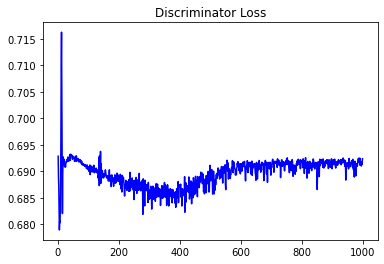

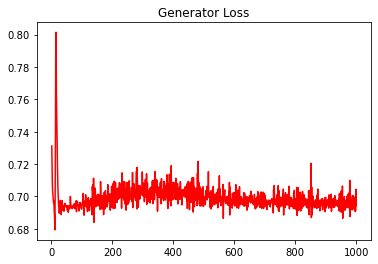

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3711368022518648


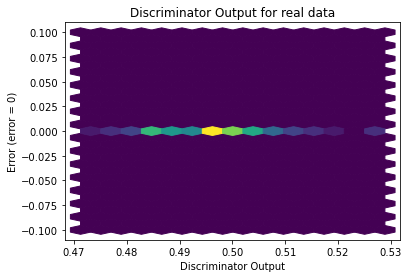

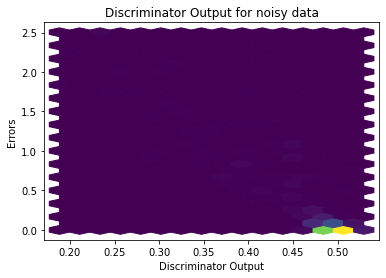

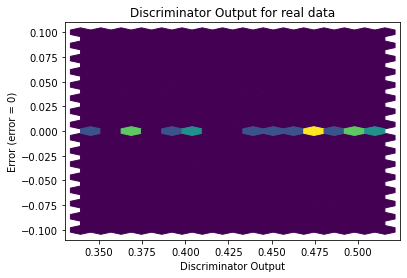

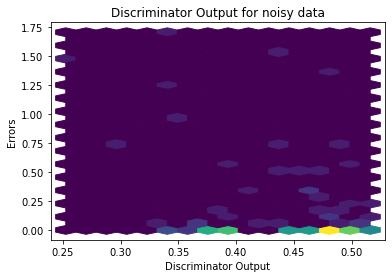

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


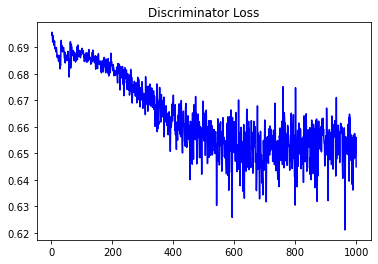

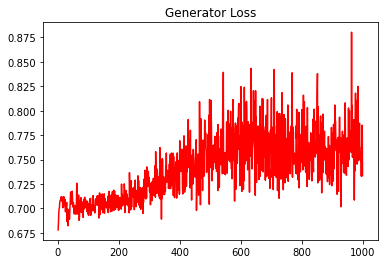

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2433862650513517


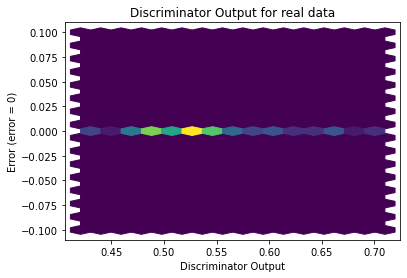

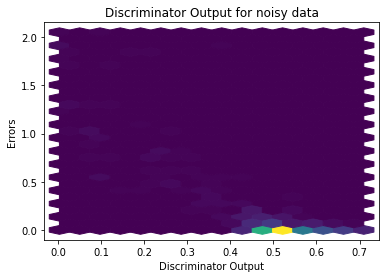

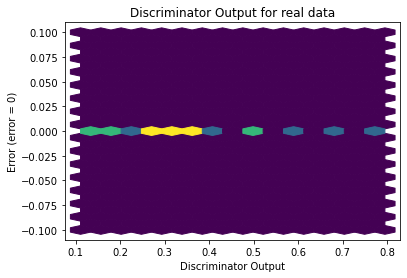

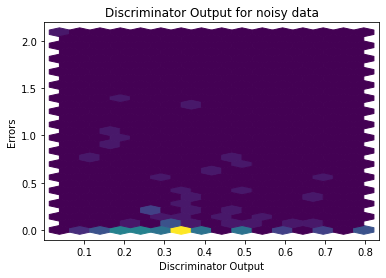

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2243]], requires_grad=True)
